# Chapter 3 Metropolis Hastings

## Problem 2 Gaussian PDF with Gaussian proposal

In [1]:
using Distributions, PyPlot, Plots

In [48]:
function gaussian_pdf(x)
    return exp(-((x-2).^2/.2))
end
function proposal(x)
    return x + rand(Normal(), 1)[1]
end

proposal (generic function with 1 method)

In [92]:
function generate_samples(probability, proposal, start)
    N = 100000
    thetas = zeros(N)
    x = start
    for step in collect(1:N)
        new_x = proposal(x)
        r = rand(Uniform(), 1)[1]
        a = probability(new_x)
        b = probability(x)
        accept = a./b
        if accept[1] > r
            x = new_x
        end
        thetas[step] = x
    end
    return thetas
end

generate_samples (generic function with 2 methods)

In [59]:
thetas = generate_samples(gaussian_pdf, proposal, 0);


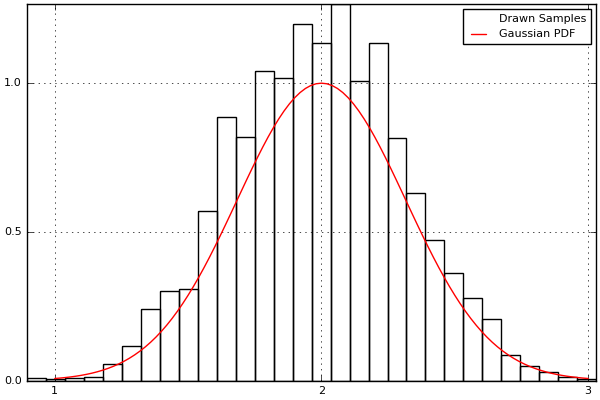

In [60]:
x = linspace(1, 3, 101)
y = gaussian_pdf(x)
Plots.histogram(thetas, normed=true, label="Drawn Samples", fill=false)
Plots.plot!(x,y, color="Red", label="Gaussian PDF")



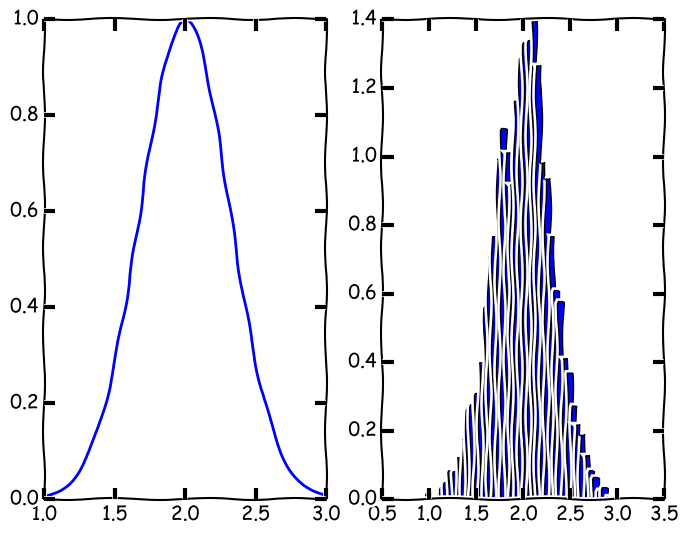

PyObject <matplotlib.text.Text object at 0x32e3ed690>


In [40]:
# xkcd()
# fig, axes = subplots(1,2)
# ax = axes[1]
# ax[:plot](x,y)
# println(ax[:title])
# ax = axes[2]
# ax[:hist](thetas, normed=true, bins=50);

## Problem 3 Uniform Distribution with Gaussian Proposal

In [84]:
function uniform_37(x)
    if x > 3 && x < 7
        return 1.0/4
    else
        return 0
    end
end

uniform_37 (generic function with 1 method)

In [94]:
uniform_thetas = generate_samples(uniform_37, proposal, 4);


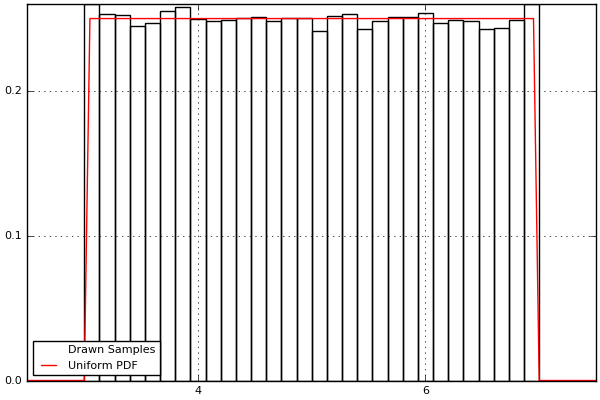

In [95]:
x = linspace(2.5, 7.5, 101)
y = map((i) -> uniform_37(i),x)  # says > operator is not defined for array with number
# TODO: find a way to vectorize this
Plots.histogram(uniform_thetas, normed=true, label="Drawn Samples", fill=false)
Plots.plot!(x,y, color="Red", label="Uniform PDF")



In order to "fix" the problem, I had to change the initialization from 0. Otherwise, no new proposals would be accepted, and the walker would not have moved anywhere.